# La Tendencia ($\mathbf{T_t}$) en Series de Tiempo 📈

---

## **¿Qué es la Tendencia?**

La **tendencia** ($\mathbf{T_t}$) es el movimiento subyacente a **largo plazo** de una serie de tiempo. Representa la dirección general hacia la que se mueve la serie, ignorando las fluctuaciones de corto plazo (estacionalidad y ruido).

* **Esencialmente:** Es el patrón persistente y sostenido en los datos.

### **Características Clave:**

| Tipo de Tendencia | Descripción |
| :--- | :--- |
| **Ascendente (Positiva)** | Los valores de la serie tienden a **aumentar** con el tiempo (ej: el PIB de un país). |
| **Descendente (Negativa)** | Los valores de la serie tienden a **disminuir** con el tiempo (ej: las ventas de un producto obsoleto). |
| **Constante (Cero)** | Los valores se mantienen relativamente estables a lo largo del tiempo. |

### **Importancia:**

Identificar y aislar la tendencia es crucial porque:

1.  Permite **proyectar** el comportamiento futuro a largo plazo (el pronóstico base).
2.  Ayuda a **desestacionalizar** la serie, facilitando el análisis de los componentes estacionales y cíclicos.

---

## **Modelando la Tendencia**

La tendencia puede ser **lineal** o **no lineal** (ej: cuadrática, exponencial).

### **Fórmula en el Modelo Aditivo**

En un modelo de descomposición aditivo, el valor observado de la serie en el tiempo $t$, $Y_t$, se compone de la suma de sus partes, donde la tendencia $T_t$ es un componente clave:

$$
Y_t = T_t + S_t + R_t
$$

Donde:
* $Y_t$: El valor de la serie de tiempo en el tiempo $t$.
* $T_t$: El componente de **Tendencia**.
* $S_t$: El componente de Estacionalidad.
* $R_t$: El componente Residual (Error).

---

## **Extracción de la Tendencia en Python**

En Python, la tendencia se extrae o se estima generalmente de dos maneras: **modelos estadísticos simples** o **filtrado**.

### **1. Descomposición con `statsmodels`**

La forma más común y visual de aislar la tendencia es mediante la función `seasonal_decompose` de la librería `statsmodels`. Esta función separa los componentes aditivos o multiplicativos.

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_5260\815285671.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Fecha': pd.to_datetime(pd.date_range('2024-01-01', periods=10, freq='M'))}


Componente de Tendencia (Descomposición):
 2024-01-31          NaN
2024-02-29    12.333333
2024-03-31    13.666667
2024-04-30    16.333333
2024-05-31    18.666667
2024-06-30    22.333333
2024-07-31    23.333333
2024-08-31    26.000000
2024-09-30    28.333333
2024-10-31          NaN
Freq: ME, Name: trend, dtype: float64


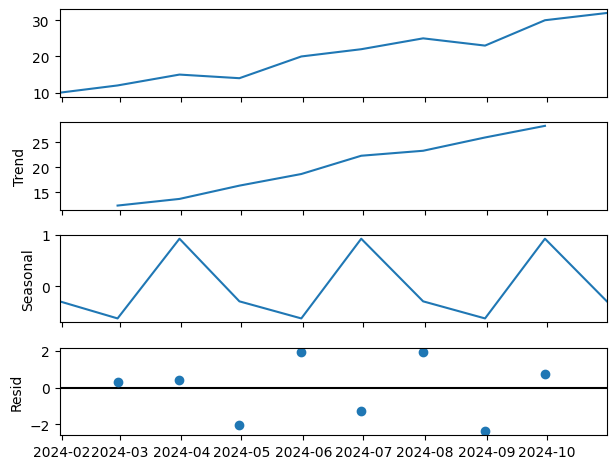

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# --- 1. DATOS DE EJEMPLO (QUITAR PARA DATOS REALES) ---
data = {'Valor': [10, 12, 15, 14, 20, 22, 25, 23, 30, 32], 
        'Fecha': pd.to_datetime(pd.date_range('2024-01-01', periods=10, freq='M'))}
serie_tiempo = pd.Series(data['Valor'], index=data['Fecha'])
# --------------------------------------------------------

# Realizar la descomposición aditiva
# 'period' debe ser igual al ciclo de estacionalidad (ej: 12 para datos mensuales)
resultado = seasonal_decompose(serie_tiempo, model='additive', period=3) 

# Obtener solo el componente de Tendencia
componente_tendencia = resultado.trend
print("Componente de Tendencia (Descomposición):\n", componente_tendencia)

# Gráfico de la Descomposición (mostraría el panel 'Trend')
resultado.plot()
plt.show()

## Estimación por Media Móvil (Smoothing)

La media móvil (Moving Average o MA) es un método de suavizado simple y efectivo para eliminar las fluctuaciones a corto plazo (estacionalidad y ruido) y revelar la tendencia subyacente.La fórmula de una media móvil de orden $k$ (simétrica) es:

$$\text{MA}_t = \frac{1}{k} \sum_{j=-m}^{m} Y_{t+j}$$

Donde $k = 2m + 1$ es el número de puntos usados en el promedio.

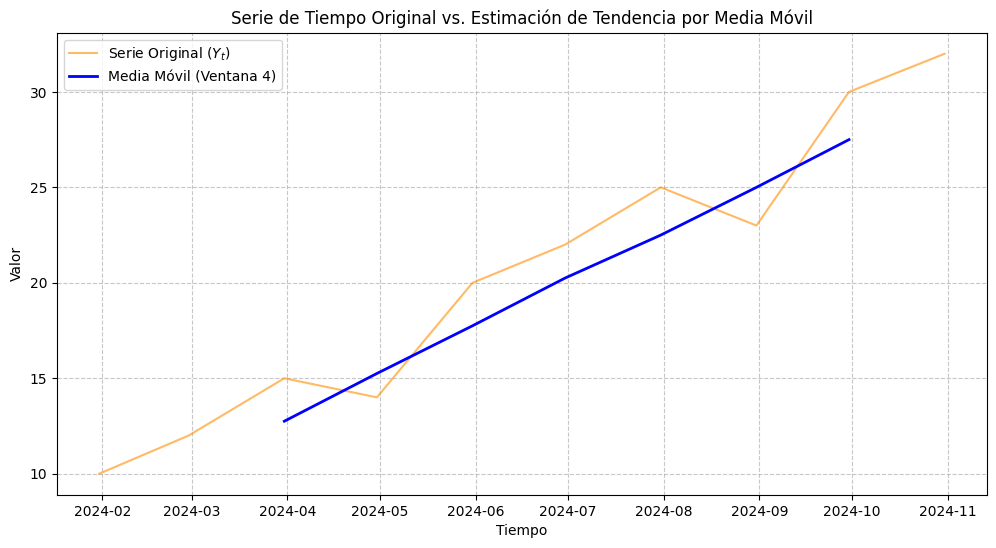

In [5]:
# Aplicar una media móvil (rolling mean) de ventana 4 para suavizar
ventana_ma = 4
tendencia_ma = serie_tiempo.rolling(window=ventana_ma, center=True).mean()

# --- COMPARACIÓN DE GRÁFICOS: ORIGINAL VS. TENDENCIA SUAVIZADA ---

plt.figure(figsize=(12, 6))
plt.plot(serie_tiempo, label='Serie Original ($Y_t$)', color='darkorange', alpha=0.6)
plt.plot(tendencia_ma, label=f'Media Móvil (Ventana {ventana_ma})', color='blue', linewidth=2)
plt.title(f'Serie de Tiempo Original vs. Estimación de Tendencia por Media Móvil')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Nota Importante:** Si la serie de tiempo presenta estacionalidad muy marcada (ej: datos mensuales con un ciclo de 12), se debe usar una media móvil cuyo orden ($k$) sea igual o cercano al período de estacionalidad (ej: 12) para eliminar dicho componente y dejar solo la tendencia.

# Tendencia y Estacionariedad

Una serie de tiempo con una tendencia clara no es estacionaria.

**Estacionariedad** significa que las propiedades estadísticas (como la media) no cambian con el tiempo.

Si hay una **tendencia ascendente**, la media de la serie está en constante aumento, violando la estacionariedad.

Eliminando la Tendencia (Diferenciación)

Para poder aplicar muchos modelos de pronóstico (como ARIMA), la serie debe ser estacionaria. La forma más común de eliminar la tendencia es la diferenciación (Differencing).

La diferenciación de primer orden es la diferencia entre el valor actual y el valor del período anterior:
$$Z_t = Y_t - Y_{t-1}$$

La serie $Z_t$ resultante es a menudo estacionaria (sin tendencia).

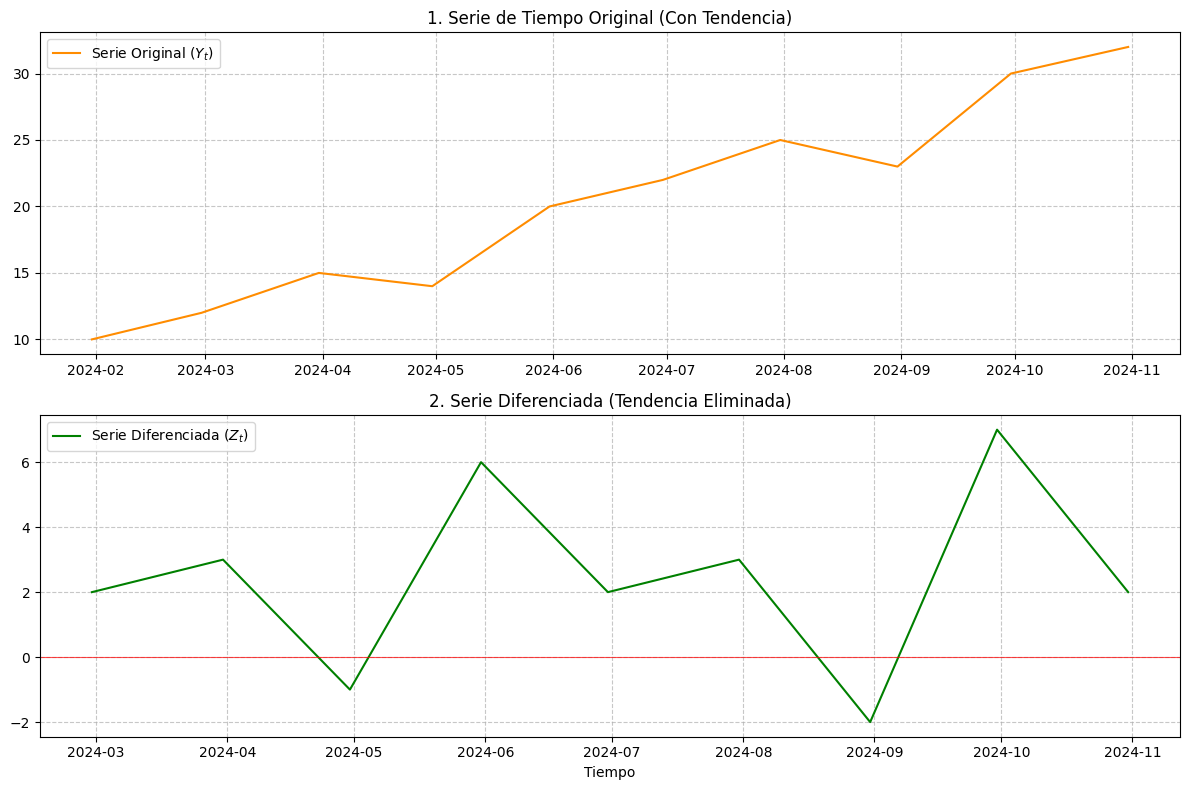

In [4]:
# Eliminar la tendencia aplicando la diferenciación de primer orden
serie_sin_tendencia = serie_tiempo.diff(periods=1).dropna()

# --- COMPARACIÓN DE GRÁFICOS: ORIGINAL VS. TENDENCIA ELIMINADA ---

plt.figure(figsize=(12, 8))

# Subgráfico 1: Serie Original
plt.subplot(2, 1, 1)
plt.plot(serie_tiempo, label='Serie Original ($Y_t$)', color='darkorange')
plt.title('1. Serie de Tiempo Original (Con Tendencia)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Subgráfico 2: Serie Diferenciada
plt.subplot(2, 1, 2)
plt.plot(serie_sin_tendencia, label='Serie Diferenciada ($Z_t$)', color='green')
plt.axhline(0, color='red', linestyle='-', linewidth=0.8, alpha=0.7) # Línea de media cero
plt.title('2. Serie Diferenciada (Tendencia Eliminada)')
plt.xlabel('Tiempo')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()